# ___IMPORTATION___

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("mushrooms.csv");df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# ___EXPLORATION___

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

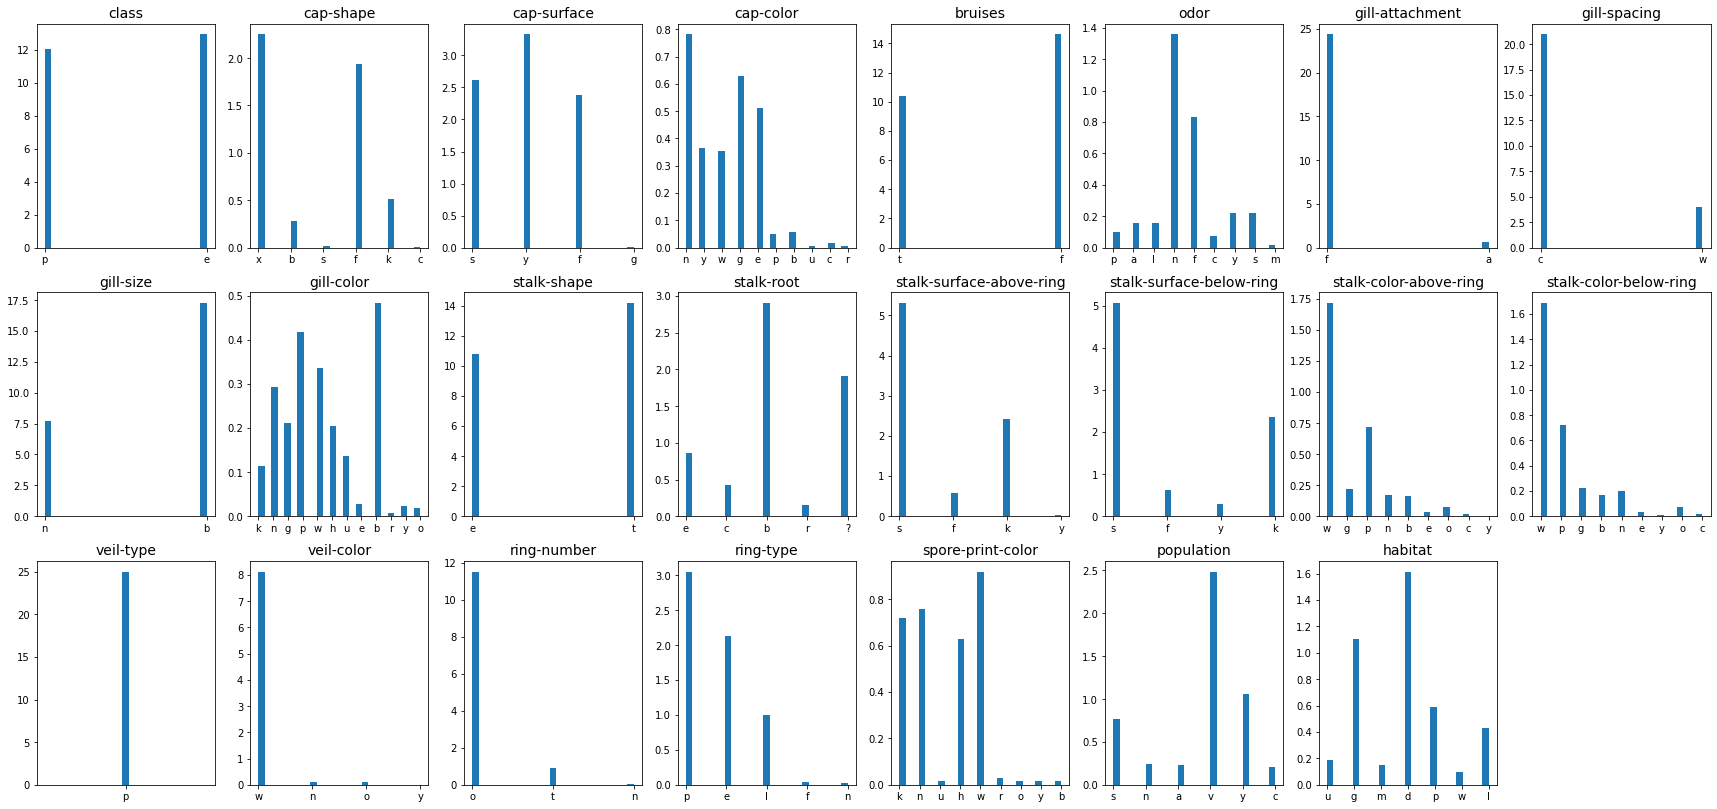

In [ ]:
X = df[df.columns[:]].values

fig = plt.figure(figsize=(30, 14))

for i in range(X.shape[1]):
    ax = fig.add_subplot(3,8, (i+1))
    h = ax.hist(X[:, i], bins=25, density=True, edgecolor='none')
    ax.set_title(df.columns[i], fontsize=14)

### ___Encoding___

In [ ]:
#encoding every columns
le = LabelEncoder()
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


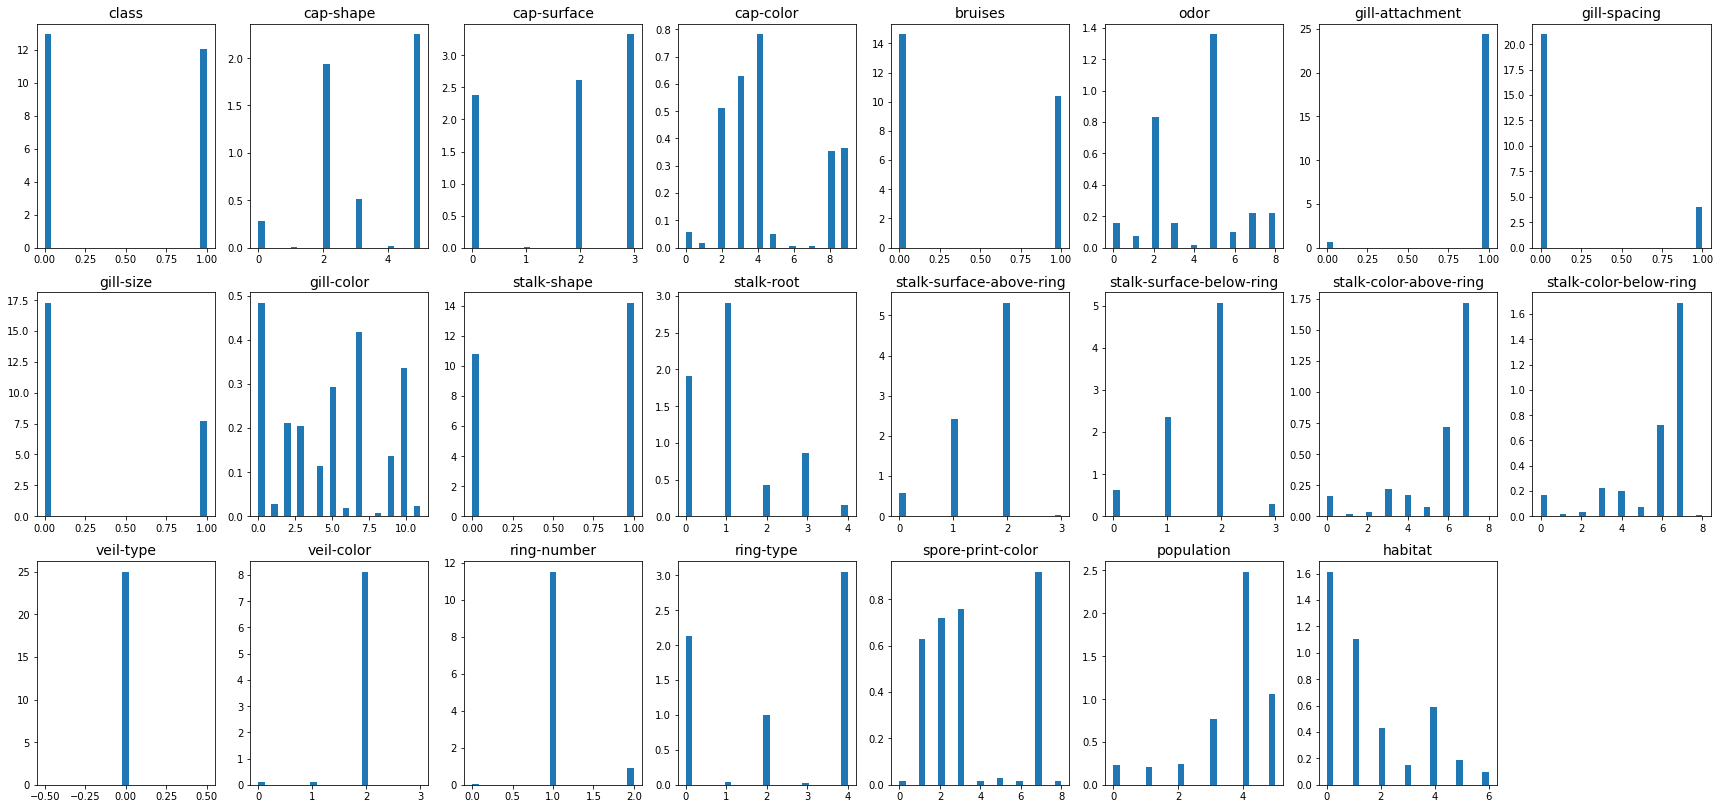

In [ ]:
X = df[df.columns[:]].values

fig = plt.figure(figsize=(30, 14))

for i in range(X.shape[1]):
    ax = fig.add_subplot(3,8, (i+1))
    h = ax.hist(X[:, i], bins=25, density=True, edgecolor='none')
    ax.set_title(df.columns[i], fontsize=14)

### ___Correlation___

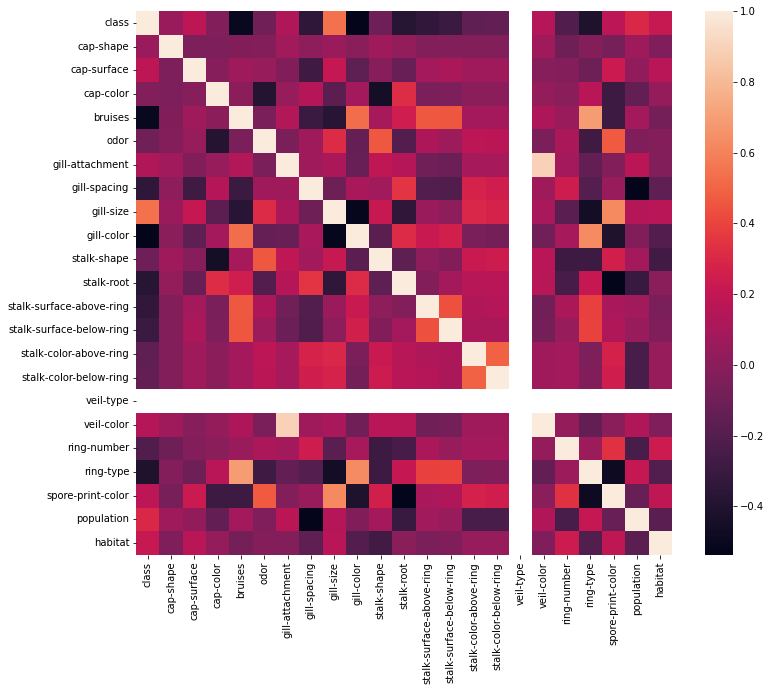

In [ ]:
plt.figure(figsize=(12,10))
ax = sb.heatmap(df.corr())

In [ ]:
#erase columns 
df = df.drop(["veil-type"],axis=1)


## ___SPLIT DATA___

In [ ]:
#Split our data to train & test set

#Define our Target
y = df['class']
#Erase the target on features
X = df.drop(["class"], axis=1) 
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.37, random_state=0)

# __K-NN__

### ___Standardisation___

In [ ]:
#standardisation to get the common scale, make it for each set

standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.transform(x_test)

### ___K neighbords___

In [ ]:
# K = sqrt(len(set point)) ------> get the right k neighbords
# we'll use impair number to don't have a coflict

math.sqrt(len(y_test))

54.8270006474912

### ___Distance___

In [ ]:
#calcule de la distance 
classifier = KNeighborsClassifier(n_neighbors=53,metric='euclidean')
#entrainement du model
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=53)

### ___Prediction___

In [ ]:
#score d'entrainement
classifier.score(x_train,y_train)

0.9857366158655725

In [ ]:
prediction = classifier.predict(x_test)
prediction

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
#score sur le test
classifier.score(x_test,y_test)

0.9873586161011311

### ___Confusion Matrix___

In [ ]:
#check the accurancy with confusion matrix

c_matrix = confusion_matrix(y_test, prediction)
c_matrix

array([[1563,    6],
       [  32, 1405]])

<function matplotlib.pyplot.show(close=None, block=None)>

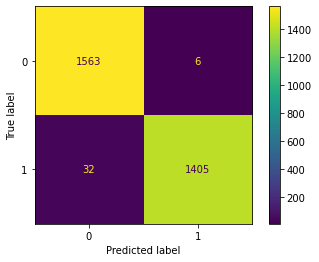

In [ ]:
#plot de matrix confusion

clf = SVC(random_state=0)
clf.fit(x_train, y_train)

clf_prediction = clf.predict(x_test)
c_matrix = confusion_matrix(y_test, prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=clf.classes_)
disp.plot()
plt.show

In [ ]:
#accurancy score TP+TN/Total
print(accuracy_score(y_test, prediction))

0.9873586161011311


In [ ]:
#Evaluate our accurancy with F1-Score = 2*[(Recall*Precision)/(Recall+Precision)]
print(f1_score(y_test,prediction))

0.9866573033707865


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


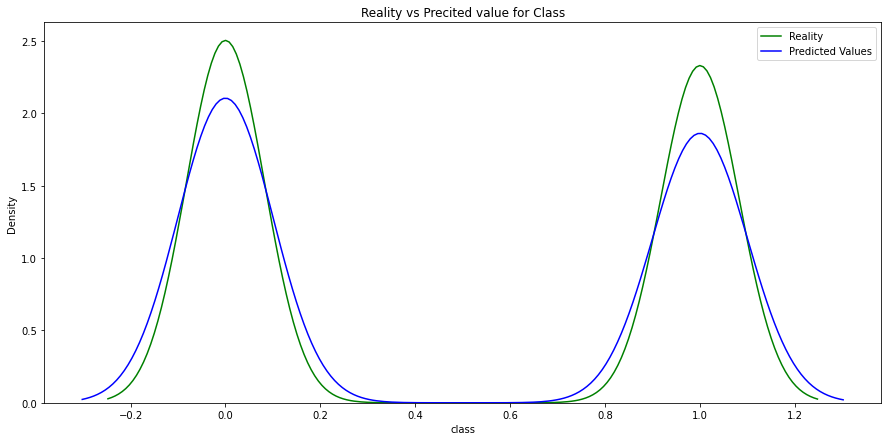

In [ ]:
#plot a prédiction vs reality

plt.figure(figsize=(15,7))
ax = sb.distplot(df['class'], hist=False, color="green", label="Reality")
sb.distplot(prediction, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('Reality vs Precited value for Class')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5820e14-f512-439e-8bfb-57003b643a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>